This Program classifies a person as having a cardiovascular disease or not

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns

In [11]:
data=pd.read_csv("cardio.csv",sep=";")

In [12]:
#data.shape
#data.head(7)

In [13]:
#Null values in each column
data.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [15]:
data.head(8)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1


In [16]:
#Checking missing values
data.isnull().values.any()

False

In [17]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
#Getting count of the no. of patients with cardio disease and non cardio
data['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cardio', ylabel='count'>

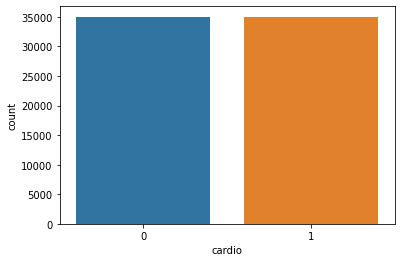

In [19]:
#visualizing upper data
sns.countplot(data['cardio'])

Age is measured in days, height is in centimeters. Let's look ate the numerical variables and how are they spread among target class.

In [20]:
#coverting age from days to years
data['year']=(data['age']/365).round(0)
data['year']=pd.to_numeric(data['year'],downcast='integer')

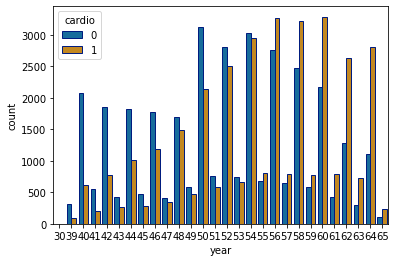

In [24]:
sns.countplot(x='year',hue='cardio',data=data,palette='colorblind',edgecolor=sns.color_palette('dark',n_colors=1))
plt.show()

In [22]:
#coorelation of the columns
data.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,year
id,1.000000,0.003457,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799,0.003050
age,0.003457,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159,0.999090
gender,0.003502,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109,-0.023017
height,-0.003038,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821,-0.081456
weight,-0.001830,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660,0.053661
ap_hi,0.003356,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475,0.020793
ap_lo,-0.002529,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719,0.017754
cholesterol,0.006106,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147,0.154386
gluc,0.002467,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307,0.098596
smoke,-0.003699,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486,-0.047884


<AxesSubplot:>

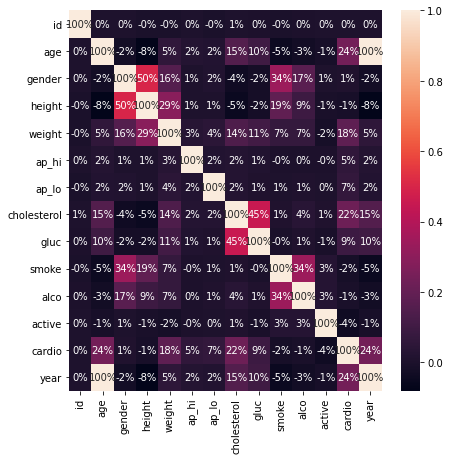

In [23]:
#visuaize the data
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
sns.heatmap(data.corr(),annot=True,fmt='.0%')

Violinplot to show height distribution across gender. Looking at the mean values of height and weight for each value of the gender feature might not be enough to determin whether 1 is male or female designation.

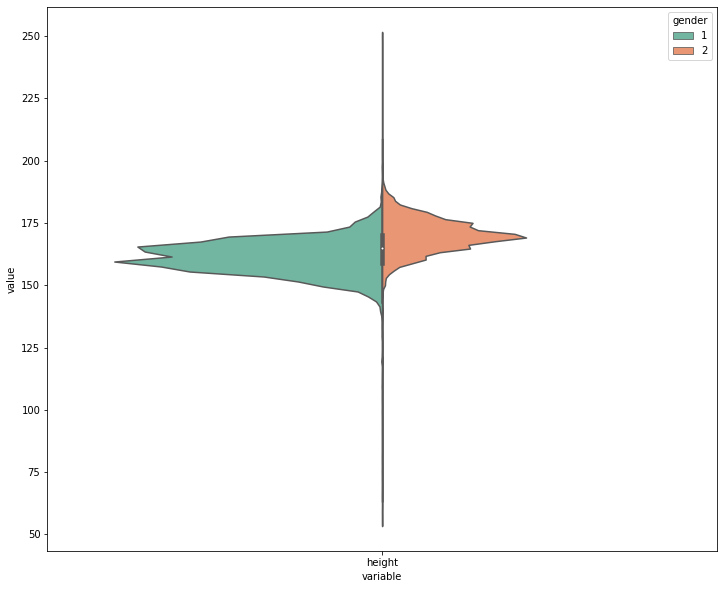

In [25]:
import warnings
warnings.filterwarnings("ignore")
df_melt = pd.melt(frame=data, value_vars=['height'], id_vars=['gender'])
plt.figure(figsize=(12, 10))
ax = sns.violinplot(
    x='variable', 
    y='value', 
    hue='gender', 
    split=True, 
    data=df_melt, 
    scale='count',
    scale_hue=False,
    palette="Set2");

Let's create a new feature - Body Mass Index (BMI):

BMI=mass kg/height^2 m
 
and compare average BMI for healthy people to average BMI of ill people. Normal BMI values are said to be from 18.5 to 25.

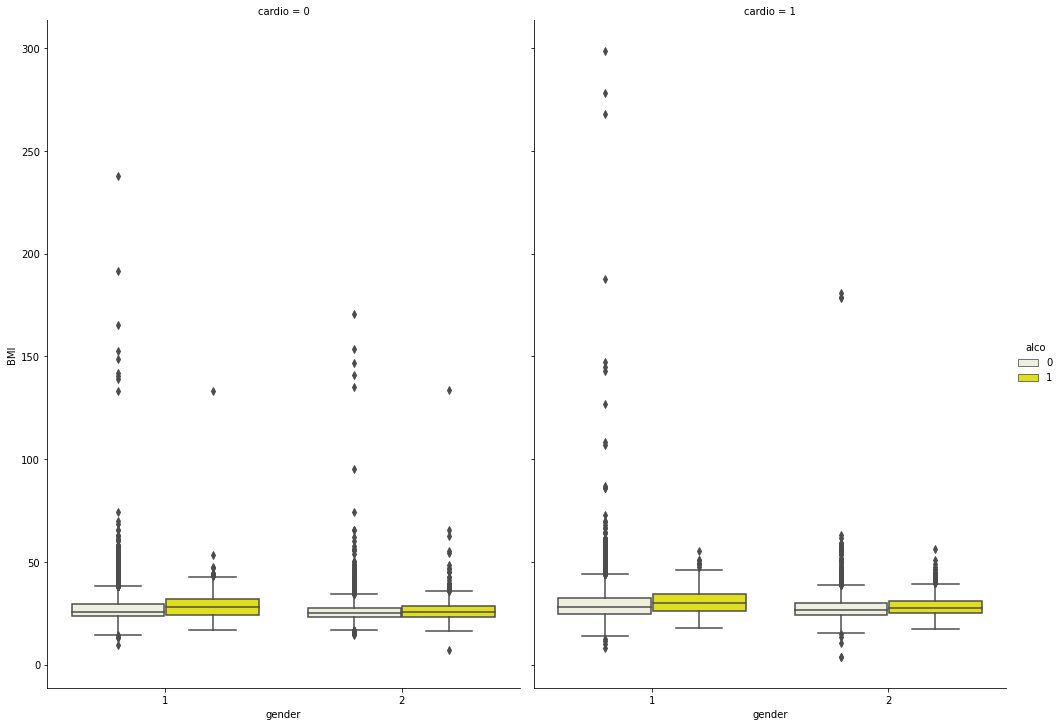

In [26]:
data['BMI'] = data['weight']/((data['height']/100)**2)
sns.catplot(x="gender", y="BMI", hue="alco", col="cardio", data=data, color = "yellow",kind="box", height=10, aspect=.7);

In [14]:
#preparing data by removing useless data like id years
data=data.drop('year',axis=1)
data=data.drop('id',axis=1)

In [15]:
#splitting data into feature data and target data
X=data.iloc[:,:-1].values #all of the rows except for the last column
Y=data.iloc[:,-1].values #all of the rows till last data

In [16]:
#split data into two parts 75% training data and 25% testing data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=1) #train_test_split(data.drop(['cardio'],axis='column'),data.cardio,test_size=0.25)

In [17]:
#featuring scaling
#scale the values in the data to be values between 0 and 1 inclusive
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [23]:
#Use ML model
#like Random Forest
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier(n_estimators=20,criterion='entropy',random_state=1)
#train the model
model.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=20, random_state=1)

In [24]:
#Test the model accuracy
model.score(X_train,Y_train)

0.9935047619047619

In [31]:
#Test the model accuracy on the test data
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,model.predict(X_test)) #origanl data vs predicted data

TN=cm[0][0]
TP=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]



In [32]:
#print confusion metrices
print(cm)
#print model accuracy on the test data
print('Model Test Accuraacy = {}'.format( (TP + TN)/(TP+TN+FN+FP)  ) )

[[6314 2295]
 [2619 6272]]
Model Test Accuraacy = 0.6354869816779171


In [29]:
#tuning n_estimator 
import pickle
for i in range(1,90):
    best=0
    from sklearn.ensemble import RandomForestClassifier
    model= RandomForestClassifier(n_estimators=i,criterion='entropy',random_state=1)
    model.fit(X_train,Y_train)
    acc=model.score(X_train,Y_train)
    if acc>best:
        best=acc
        with open("model.pickle","wb")as f:
            pickle.dump(model,f)

In [30]:
pickle_in=open("model.pickle","rb")
model=pickle.load(pickle_in)

In [35]:
#Test the model accuracy on the test data
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,model.predict(X_test)) #origanl data vs predicted data

TN=cm[0][0]
TP=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]


#print confusion metrices
print(cm)
#print model accuracy on the test data
print('Model Test Accuraacy = {}'.format( (TP + TN)/(TP+TN+FN+FP)  ) )

[[6314 2295]
 [2619 6272]]
Model Test Accuraacy = 0.7192


In [34]:
acc

0.9997714285714285

In [36]:
cm

array([[6314, 2295],
       [2619, 6272]], dtype=int64)

Text(69.0, 0.5, 'Truth')

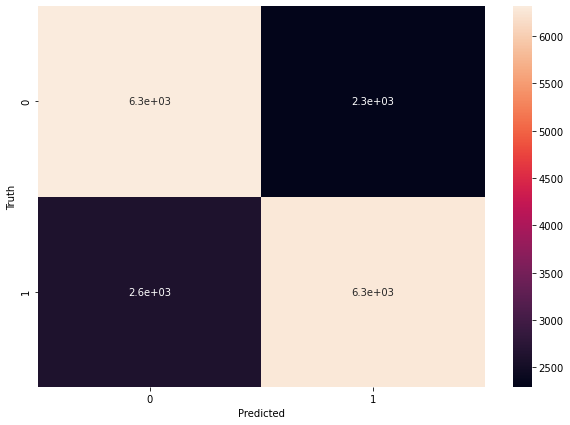

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Reference
With the help of my friend(Bio student) I created this mini project